# How well do jobs and skills pay for Data Scientists?

### Methology
1. Evaluate median salary for top data jobs
2. Find median salary per skill for Data Scientists
3. Visualize for highest paying skills and most demanded skills


In [41]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

#Load the dataset from hugging face
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#clean the data for date
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
    

In [42]:
df_US = df[(df['job_country']=='United States')].dropna(subset=['salary_year_avg'])

In [43]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [44]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]


In [45]:
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

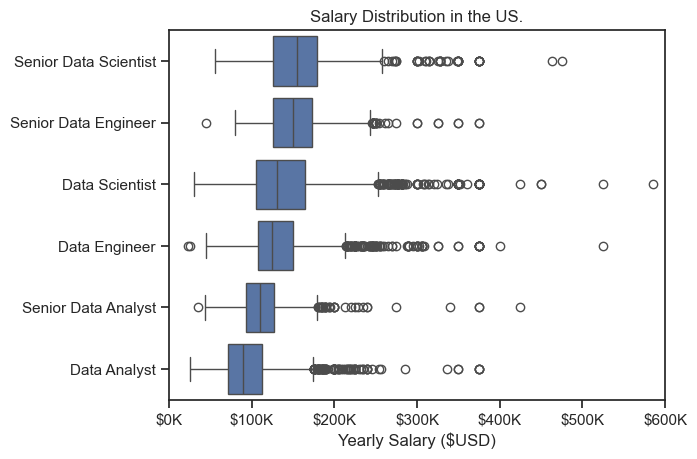

In [46]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distribution in the US.')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [47]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()
df_DS_US= df_DS_US.dropna(subset='salary_year_avg')

df_DS_US = df_DS_US.explode('job_skills')
df_DS_US[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
100,228222.0,sql
100,228222.0,r
100,228222.0,python
100,228222.0,express
116,114000.0,r


In [48]:
df_DS_top_pay = df_DS_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DS_top_pay = df_DS_top_pay.head(10)

df_DS_top_pay

,count,median
job_skills,,
asana,5,259000.00000
airtable,6,224250.00000
watson,10,213500.00000
unreal,4,211500.00000
ruby on rails,4,195500.00000
redhat,1,189500.00000
notion,9,187500.00000
slack,11,180000.00000
hugging face,15,179000.00000


In [49]:
df_DS_skills = df_DS_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DS_skills = df_DS_skills.head(10).sort_values(by='median', ascending=False)

df_DS_skills

,count,median
job_skills,,
tensorflow,474,149646.0
spark,718,135959.5
sql,2463,134500.0
aws,768,134000.0
python,3358,131867.0
r,2053,126000.0
tableau,989,125000.0
hadoop,468,125000.0
excel,490,124290.0


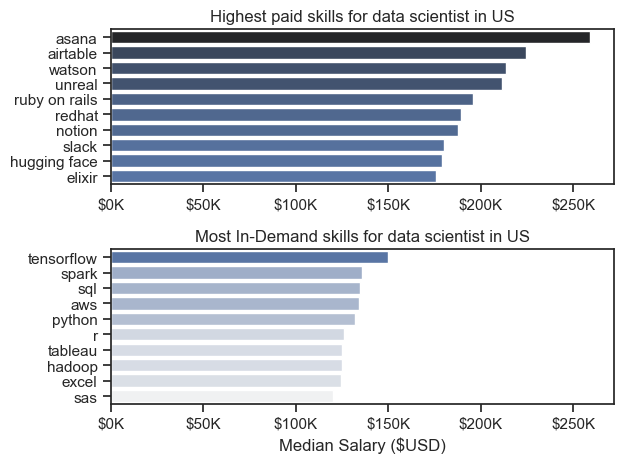

In [50]:
fig, ax = plt.subplots(2, 1)
sns.set_theme(style='ticks')

sns.barplot(data=df_DS_top_pay, x='median', y=df_DS_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Highest paid skills for data scientist in US')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

sns.barplot(data=df_DS_skills, x='median', y=df_DS_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()
ax[1].set_title('Most In-Demand skills for data scientist in US')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout()